<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/blest_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer(as_frame=True)
df=df.frame

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
y=df['target']
x=df.drop(['target'],axis=1)

In [76]:
print(y.shape)
print(y.value_counts())

(569,)
target
1    357
0    212
Name: count, dtype: int64


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


Text(0.5, 1.0, 'test')

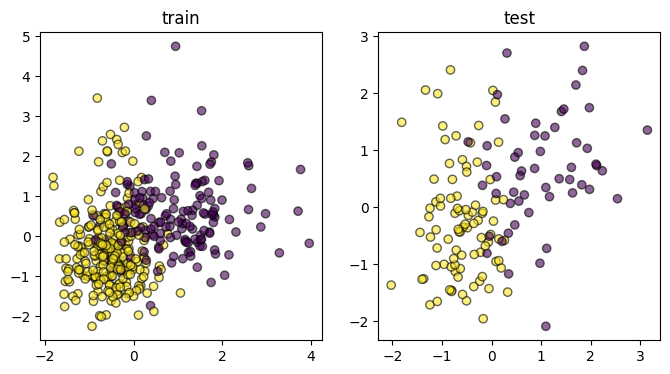

In [79]:
#visualize
fig ,ax=plt.subplots(1,2,figsize=(8,4))

ax1,ax2=ax
ax1.scatter(x=x_train[:,0],y=x_train[:,1],c=y_train,alpha=0.6,edgecolors='black')
ax2.scatter(x=x_test[:,0],y=x_test[:,1],c=y_test,alpha=0.6,edgecolors='black')
ax1.set_title("train")
ax2.set_title('test')

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtc=DecisionTreeClassifier(random_state=42)

In [82]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
from sklearn.metrics import classification_report
y_pred=dtc.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.96      0.97      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [85]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [88]:
y_pred=rfc.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

